In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering



## Part 1: Data Preparation and Scaling

In [2]:
# Data loading
file_path = Path("./Resources/myopia.csv")
df = pd.read_csv(file_path)
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [3]:
df.notnull().count()

AGE          618
SPHEQ        618
AL           618
ACD          618
LT           618
VCD          618
SPORTHR      618
READHR       618
COMPHR       618
STUDYHR      618
TVHR         618
DIOPTERHR    618
MOMMY        618
DADMY        618
MYOPIC       618
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df_copy = df.drop("MYOPIC", axis=1)
labels = df["MYOPIC"]

In [6]:
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [7]:
df_copy.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_copy)
scaled_data

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

## Part 2: Dimensionality Reduction



In [9]:
# Applying PCA to reduce dimensions

# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the iris data.
myopia_pca = pca.fit_transform(scaled_data)

In [10]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(data=myopia_pca)
df_myopia_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [11]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [12]:
tsne = TSNE(learning_rate=100)

In [13]:
tsne_features = tsne.fit_transform(df_myopia_pca)


In [14]:
tsne_features

array([[ -8.002467 ,  18.554579 ],
       [-18.556986 ,   5.8646135],
       [ 26.862871 ,   5.568993 ],
       ...,
       [-17.814283 ,   3.771066 ],
       [ 22.665108 ,  -4.395842 ],
       [-19.51592  ,  14.381662 ]], dtype=float32)

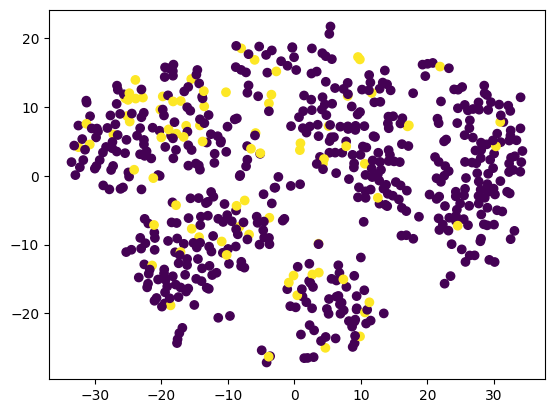

In [15]:
plt.scatter(tsne_features[:,0], tsne_features[:, 1], c=labels)
plt.show()

In [16]:
import warnings
warnings.filterwarnings("ignore")

## Part 3: Cluster Analysis with K-means

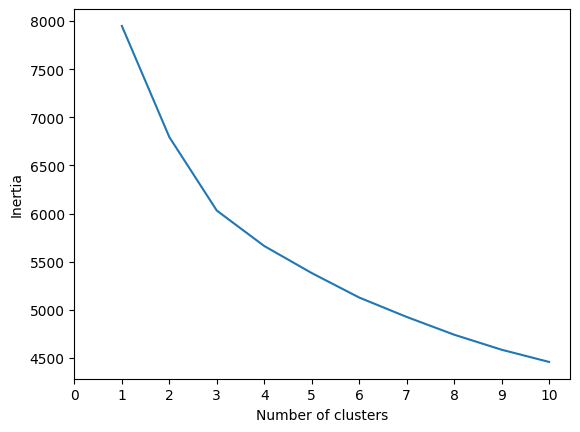

,k,inertia
0,1,7948.905345
1,2,6794.293482
2,3,6030.953812
3,4,5662.799045
4,5,5381.970825


In [17]:

# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_myopia_pca)
    u = km.inertia_
    inertia.append(u)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

## Using Inertia Value to find Optimal Hyperparameters


In [18]:
# Using Inertia Value for Finding Optimal Hyperparameters

init_list = ["k-means++", "random"]
inertia_list = []
for init in init_list:
    kmeans_model = KMeans(n_clusters=3, random_state=42, init=init)
    kmeans_model.fit(df_copy)
    inertia_list.append(kmeans_model.inertia_)

results = pd.DataFrame(data=inertia_list, columns=["Inertia Value"], index=init_list)
results


,Inertia Value
k-means++,93108.597058
random,93108.597058


In [19]:
predictions = kmeans_model.predict(df_copy)
predictions

array([1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1,
       1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1,
       2, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 2, 1, 0, 2, 2, 2,
       2, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1,
       2, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 0, 2, 2,
       2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2,

In [20]:
df["Class"] = predictions
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,Class
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0,2
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0,2
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0,2
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0,2
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0,1


In [21]:
df["AGE"].unique()

array([6, 5, 7, 8, 9])

## Hierarchial_Clustering Confirming the distinguishability of the dataset

In [22]:
normalized = normalize(df_copy)

In [23]:
mergings = linkage(normalized, method="ward")

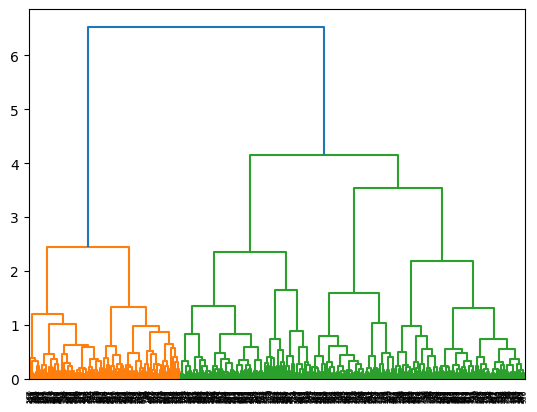

In [24]:
plt.figure()
dendrogram(mergings, leaf_rotation=90, leaf_font_size=5)
plt.show()

## Part 4: Making Recommendations

Discussion:

(1) Inspite of performing dimensionality reduction employing PCA and tSNE, no specific pattern or clusters within the dataset was obtained. 

(2) Furthermore, with the help of the elbow curve the dataset was further analysed employing n_clusters=3; this yielded a inertia value of 6030. Further training of the data specifically using n_clusters=3; didnot yield a successful dispersion of the dataset forming any specific clusters.

(3) For the unsupervised K-Means algorithm, inertia value can be used to find better hyperparameters. One such method is the initialization.Using Scikit Learn's "k-means++" and "random" methods, the model was re-trained and the value of its inertia was compared. The lower most value of inertia obtained can then be used for hyperparameter tuning. However, in the above dataset, even this approach failed to obtain distinguishable clusters. 

(4) The dataset was separated into two major clusters (orange and green) (most probably indicating myopic and non-myopic group respectivly) was confirmed by Hierarchial Clustering Model.

(5) Therefore, it can be concluded that unsupervised Machine Learning algorithm using KMeans (combined with PCA & tSNE) failed to identify any clusters that can be used to predict Myopia in Children aged between 5-9 years old. However, Hierarchial clustering with further refinement of hyperparameters could potentially yield a better performing predictive model.
